# Pymaceuticals Analysis by Eric Dowd

In [1]:
#loading modules needed for analysis
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Reading both csv files with PANDA
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combining both data sets into one data set with Panda Merge
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Previewing combined data set
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Displaying the total number of mice.

print("There are",len(combined_data["Mouse ID"].unique()),"total mice.")


There are 249 total mice.


## Summary Statistics

In [3]:
# Generating a summary statistics table of mean, median, variance, standard deviation, 
#  and SEM of the tumor volume for each regimen using groupby.

regimen_mean = combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
regimen_median = combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
regimen_variance = combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
regimen_std = combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
regimen_sem = combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
regimen_summary = pd.DataFrame({"Mean Tumor Volume":regimen_mean,"Median Tumor Volume":regimen_median, 
                                "Tumor Volume Variance":regimen_variance,"Tumor Volume Std. Dev.":regimen_std,
                                "Tumor Volume Std. Err.":regimen_sem})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

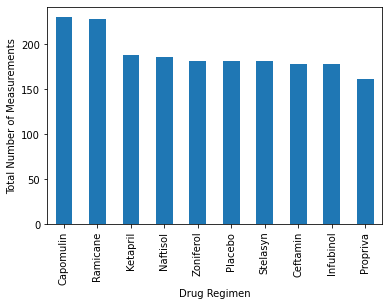

In [4]:
#Showing the total number of measurements taken on each drug regimen using pandas.
measurements = combined_data['Drug Regimen'].value_counts()
measurements.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()


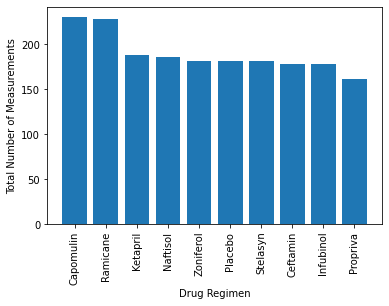

In [5]:
#Showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(measurements.index.values,measurements.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xticks(rotation=90)

plt.show()

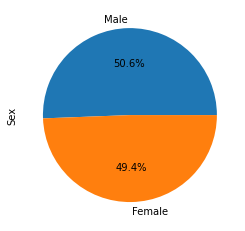

In [6]:
# Distribution of female versus male mice using pandas

measurements = combined_data.Sex.value_counts()
measurements.plot(kind="pie",autopct='%1.1f%%')
plt.show()

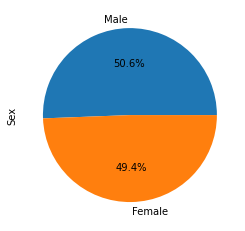

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(measurements.values,labels=measurements.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()